In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Set the path to the training and testing directories on Google Drive
train_dir = '/content/drive/MyDrive/dataset3/Training'
test_dir = '/content/drive/MyDrive/dataset3/Testing'

In [ ]:
# Set the number of classes and image dimensions
num_classes = 4
image_height, image_width = 150, 150

In [ ]:
# Set the batch size and number of epochs
batch_size = 32
epochs = 10

In [ ]:
# Create data generators for training and testing
train_datagen = ImageDataGenerator(rescale=1.0/255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 5714 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [ ]:
# Build the CNN model for feature extraction
base_model = tf.keras.applications.VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(image_height, image_width, 3)
)
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Build the ANN model for classification
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
def grasshopper_optimization_algorithm(model, train_generator, num_iterations):
    num_grasshoppers = model.count_params()
    positions = np.random.uniform(low=-1.0, high=1.0, size=(num_grasshoppers,))

    for iteration in range(num_iterations):
        fitness_values = evaluate_fitness(model, train_generator, positions)
        best_position = positions[np.argmax(fitness_values)]
        positions = update_positions(positions, best_position)

    set_weights(model, positions)
def evaluate_fitness(model, train_generator, positions):
    set_weights(model, positions)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    fitness_values = model.evaluate(train_generator)
    return fitness_values
def update_positions(positions, best_position):
    step_size = 0.1
    delta = np.abs(positions - best_position)
    random_movement = np.random.uniform(low=-1.0, high=1.0, size=positions.shape)
    positions = positions + step_size * np.exp(-delta) * random_movement
    return positions
def set_weights(model, positions):
    flat_positions = np.ravel(positions)
    index = 0
    for layer in model.layers:
        if layer.trainable_weights:
            layer_weights_shape = layer.get_weights()[0].shape
            layer_weights_size = np.prod(layer_weights_shape)
            layer_weights = flat_positions[index:index+layer_weights_size].reshape(layer_weights_shape)

            if len(layer_weights_shape) == 2:
                # Set weights for a dense layer (weight matrix and bias vector)
                layer_bias_shape = layer.get_weights()[1].shape
                layer_bias_size = np.prod(layer_bias_shape)
                layer_bias = flat_positions[index+layer_weights_size:index+layer_weights_size+layer_bias_size].reshape(layer_bias_shape)
                layer.set_weights([layer_weights, layer_bias])
                index += layer_weights_size + layer_bias_size
            else:
                # Set weights for other layers (e.g., convolutional layers)
                layer.set_weights([layer_weights])
                index += layer_weights_size
grasshopper_optimization_algorithm(model, train_generator, 1)

179/179 [==============================] - 1549s 9s/step - loss: 187.2276 - accuracy: 0.3843


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# # fit the model
# # Run the cell. It will take some time to execute
# r = model.fit_generator(
#   train_generator,
#   validation_data=test_generator,
#   epochs=10,
#   steps_per_epoch=10,
#   validation_steps=5
# )
# Train the hybrid model
model.fit(train_generator,
          steps_per_epoch=10,
          epochs=10)

Epoch 1/10
10/10 [==============================] - 86s 8s/step - loss: 91.4622 - accuracy: 0.3594
Epoch 2/10
10/10 [==============================] - 85s 8s/step - loss: 42.5328 - accuracy: 0.4031
Epoch 3/10
10/10 [==============================] - 92s 9s/step - loss: 29.4658 - accuracy: 0.4969
Epoch 4/10
10/10 [==============================] - 85s 8s/step - loss: 16.9590 - accuracy: 0.5938
Epoch 5/10
10/10 [==============================] - 87s 9s/step - loss: 15.2924 - accuracy: 0.6750
Epoch 6/10
10/10 [==============================] - 87s 9s/step - loss: 14.0002 - accuracy: 0.6406
Epoch 7/10
10/10 [==============================] - 87s 9s/step - loss: 10.6398 - accuracy: 0.6812
Epoch 8/10
10/10 [==============================] - 87s 9s/step - loss: 9.9941 - accuracy: 0.7156
Epoch 9/10
10/10 [==============================] - 85s 9s/step - loss: 11.1286 - accuracy: 0.6938
Epoch 10/10
10/10 [==============================] - 85s 8s/step - loss: 10.5099 - accuracy: 0.7219


In [ ]:
    # Evaluate the model on the testing set
loss, accuracy = model.evaluate(test_generator,
                                steps=len(test_generator))
print(f'Testing Loss: {loss:.4f}')
print(f'Testing Accuracy: {accuracy:.4f}')

NameError: ignored

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
 # N - Normal Beat
# S - Supraventricular premature beat
# v - Premature ventricular contraction
# F - Fusion of ventricular and normal beat
# Q - Unclassifiable beat
# M - Myocardial infraction

In [ ]:
import matplotlib.pyplot as plt

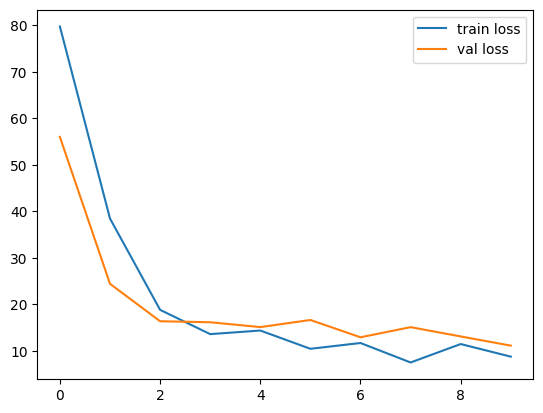

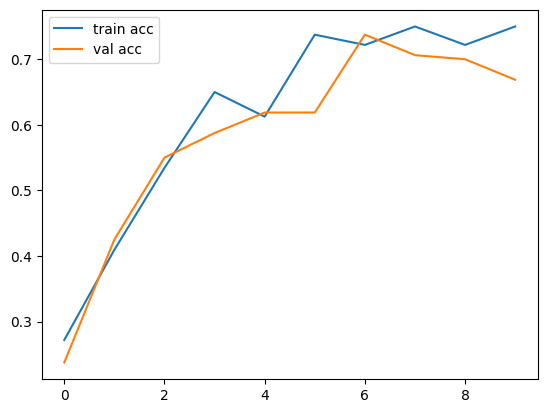

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
y_pred = model.predict(test_generator)
y_pred

41/41 [==============================] - 318s 8s/step


array([[9.9999994e-01, 4.3846316e-26, 0.0000000e+00, 5.9286091e-36],
       [9.9999994e-01, 2.7235100e-17, 0.0000000e+00, 6.1090878e-35],
       [0.0000000e+00, 0.0000000e+00, 9.9999994e-01, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [7.3766286e-17, 1.0000000e+00, 6.3150086e-24, 2.2188682e-37],
       [9.9775208e-22, 1.4136313e-01, 0.0000000e+00, 8.5863692e-01]],
      dtype=float32)

In [ ]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

In [ ]:
print(y_pred)

[4 3 0 3 3 4 3 0 4 3 1 2 4 4 1 3 4 4 3 4 4 4 4 4 0 3 0 0 1 3 3 4 3 3 0 3 4
 4 4 0 4 4 4 4 4 3 0 4 0 4 4 4 0 3 0 0 4 4 3 1 4 0 4 3 0 4 3 3 4 3 0 3 4 3
 3 4 4 3 4 4 0 4 4 4 0 3 4 4 4 4 4 3 4 3 3 2 3 4 3 3 0 4 0 4 4 1 0 4 4 4 3
 1 4 4 4 3 3 4 4 4 3 4 4 4 0 3 4 3 4 4 4 4 0 4 3 4 4 0 4 4 4 3 3 1 4 4 4 4
 3 3 3 4 0 4 3 4 3 0 4 1 0 0 4 3 3 1 4 4 3 3 4 4 0 4 3 4 4 4 4 4 4 1 3 4 4
 4 2 4 1 4 3 4 2 4 4 3 4 4 4 4 4 4 2 4 1 4 3 4 0 4 0 4 4 4 4 0 3 4 4 0 3 4
 3 4 0 3 4 4 3 4 4 3 0 0 4 3 3 4 0 0 3 4 4 2 4 4 4 1 0 3 4 4 4 3 4 4 3 4 3
 2 3 3 4 4 3 2 4 4 0 4 0 4 2 4 2 4 3 4 4 3 4 4 4 4 4 3 4 4 4 4 3 3 0 0 4 4
 0 4 4 4 4 4 3 4 4 4 3 4 3 4 3 3 3 4 0 4 4 2 3 0 4 4 4 2 4 3 4 4 4 4 2 4 4
 4 3 4 0 4 4 4 4 3 4 3 4 4 4 4 3 4 0 3 3 4 3 4 1 3 4 0 4 3 4 4 4 0 4 0 0 4
 2 4 4 4 3 4 0 3 3 4 2 3 4 4 3 4 4 4 4 3 0 0 4 4 4 4 4 4 4 4 3 4 4 3 3 0 4
 4 4 4 0 3 4 3 4 4 3 4 0 4 4 4 3 3 3 4 4 4 3 0 3 0 0 4 0 4 3 0 4 4 3 1 3 4
 0 4 4 4 4 4 1 0 3 4 4 3 4 4 4 1 4 4 3 4 4 4 3 4 3 3 0 4 0 4 4 4 3 4 3 3]


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
cm = confusion_matrix(test_generator.labels, y_pred)
print(cm)

[[ 70  89  71  70]
 [ 47  98  69  92]
 [ 57 121 107 120]
 [ 52  93  65  90]]


In [ ]:
import pandas as pd
report = classification_report(test_generator.labels, y_pred, target_names=['F', 'M', 'N', 'Q', 'S', 'V'],digits=4)
print(report )

def report_to_df(report):
    report = [x.split(' ') for x in report.split('\n')]
    header = ['Class Name']+[x for x in report[0] if x!='']
    values = []
    for row in report[1:-5]:
        row = [value for value in row if value!='']
        if row!=[]:
            values.append(row)
    df = pd.DataFrame(data = values, columns = header)
    return df
report = report_to_df(report)

report.to_csv('classification report.csv', index=True)

              precision    recall  f1-score   support

           F     0.0137    0.0124    0.0130       161
           M     0.2762    0.2756    0.2759      2101
           N     0.3168    0.3131    0.3149      2482
           Q     0.1265    0.1218    0.1241       772
           S     0.0718    0.0719    0.0719       556
           V     0.1995    0.2101    0.2046      1447

    accuracy                         0.2389      7519
   macro avg     0.1674    0.1675    0.1674      7519
weighted avg     0.2387    0.2389    0.2388      7519



Confusion matrix, without normalization


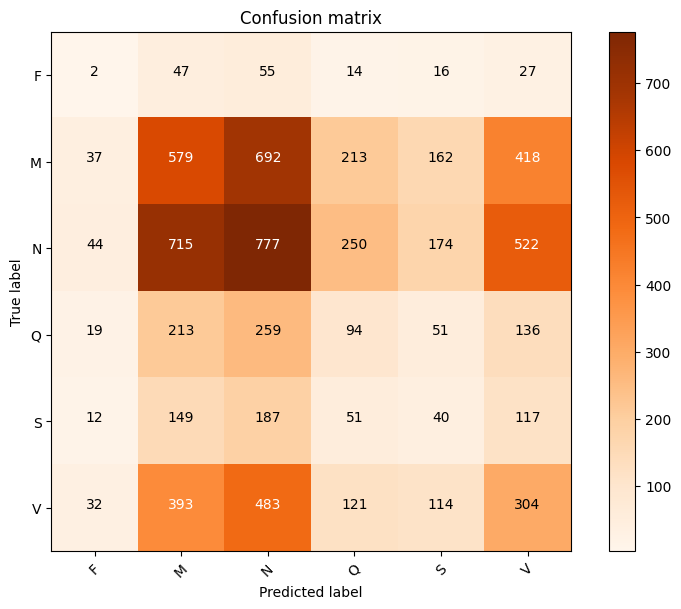

In [ ]:

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.colorbar()

    fmt = '.4f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.rcParams['font.size'] = '20'


plot_confusion_matrix(cm, classes=['F', 'M', 'N', 'Q', 'S', 'V'],normalize=False,title='Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig('confusion matrix' + '.jpg', dpi=500, bbox_inches = 'tight')

Normalized confusion matrix


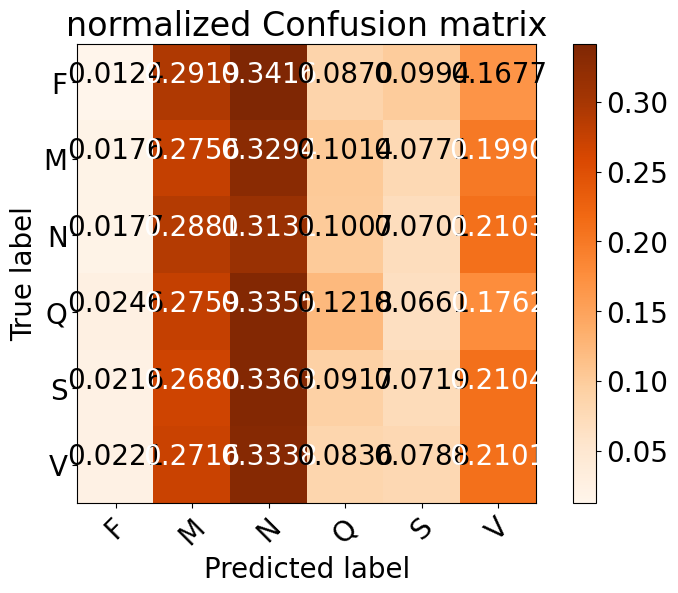

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.colorbar()

    fmt = '.4f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.rcParams['font.size'] = '10'


plot_confusion_matrix(cm, classes=['F', 'M', 'N', 'Q', 'S', 'V'],normalize=True,title='normalized Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig('normalized confusion matrix' + '.jpg', dpi=200, bbox_inches = 'tight')

In [ ]:
# import cv2
# import numpy as np
# from keras.models import load_model


# # Load and preprocess the image
# image_path = '/content/drive/MyDrive/DATASET/Test/V/69.png'
# image = cv2.imread(image_path)
# image = cv2.resize(image, (150, 150))  # Adjust the size as per the model's input requirements
# image = image / 255.0  # Normalize pixel values if required
# image = np.expand_dims(image, axis=0)  # Add batch dimension

# # Perform the prediction
# predictions = model.predict(image)
# predicted_class = np.argmax(predictions, axis=1)

# # Print the predicted class
# print('Predicted class:', predicted_class)


error: ignored

In [ ]:
test_generator.labels

In [ ]:
from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [ ]:
import cv2
import os
true_value = []
pred = []
i=0
for folder in os.listdir(test_dir):
    i=0
    test_image_ids = os.listdir(os.path.join(test_dir,folder))

    for image_id in test_image_ids[:int(len(test_image_ids))]:

        path = os.path.join(test_dir,folder,image_id)

        true_value.append(test_generator.class_indices[folder])
        img = cv2.resize(cv2.imread(path),(150,150))
        img_normalized = img/255

        p = np.argmax(model.predict(np.array([img_normalized])))
        pred.append(p)

1/1 [==============================] - 0s 260ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
#from mlxtend.plotting import plot_confusion_matrix
def clf_report(true_value, model_pred):

    classes = test_generator.class_indices.keys()
    TP_count = [true_value[i] == model_pred[i] for i in range(len(true_value))]
    model_accuracy = np.sum(TP_count)/len(TP_count)
    print('Model Accuracy', model_accuracy)

    plt.figure(figsize=(7,7))
    cm = confusion_matrix(true_value,model_pred)
    plt.imshow(cm,interpolation='nearest',cmap=plt.cm.viridis)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max()*0.8
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                horizontalalignment="center",
                color="black" if cm[i,j] > thresh else "white")
        pass

    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    pass

    print(classification_report(true_value, model_pred, target_names = list(classes)))

Model Accuracy 0.6926010678871091
              precision    recall  f1-score   support

      glioma       0.77      0.51      0.62       300
  meningioma       0.48      0.70      0.57       306
     notumor       0.84      0.87      0.86       405
   pituitary       0.76      0.63      0.68       300

    accuracy                           0.69      1311
   macro avg       0.71      0.68      0.68      1311
weighted avg       0.72      0.69      0.70      1311



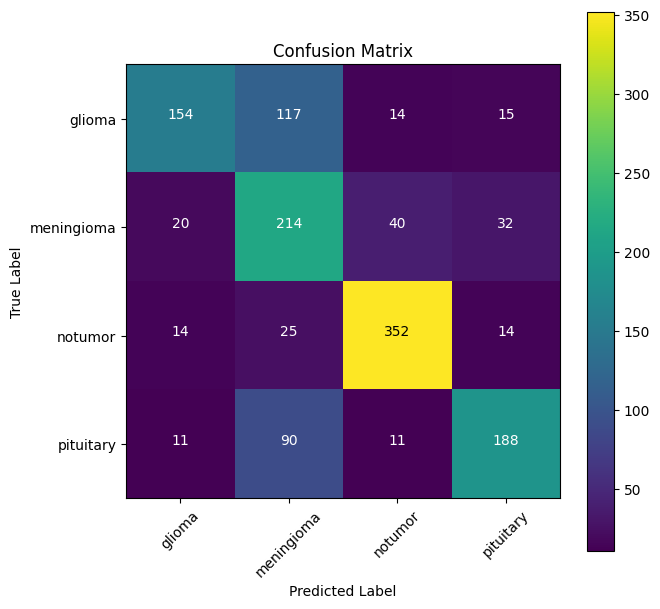

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import itertools
import matplotlib.pyplot as plt
clf_report(true_value, pred)

In [ ]:
from tensorflow.keras.models import load_model

model.save('grass_vnn1.h5')